# Simple Linear Regression (Book Read Hours Prediction)

## Explanation

To create a machine learning model that can predict a book read hours, using the Simple Linear Regression algorithm.

### Column Descriptions

- ***HoursSpentReading*** = hour spent reading a book
- ***BooksRead*** = count of book read

## A. Data Preparation

### A.1 Import Libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [35]:
try:
    df = pd.read_csv('book_read".csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Gagal Membaca Data


### A.3 Viewing Data Dimensions

In [36]:
df.shape

(300, 2)

### A.4 Viewing Data Informations

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HoursSpentReading  300 non-null    float64
 1   BooksRead          300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


### A.5 Viewing Data Statistics

In [38]:
df.describe().T.style.format("{:.4f}").background_gradient(cmap='flare')

,count,mean,std,min,25%,50%,75%,max
HoursSpentReading,300.0000,10.0000,5.8025,0.0000,5.0000,10.0000,15.0000,20.0000
BooksRead,300.0000,2.4998,1.4740,0.0000,1.2873,2.5547,3.7387,5.1758


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [39]:
df.head()

,HoursSpentReading,BooksRead
0,0.000000,0.099343
1,0.066890,0.000000
2,0.133779,0.162983
3,0.200669,0.354773
4,0.267559,0.020059


In [40]:
df.tail()

,HoursSpentReading,BooksRead
295,19.732441,4.794528
296,19.799331,5.129753
297,19.866221,5.028015
298,19.933110,5.145850
299,20.000000,5.125926


### A.7 Viewing Duplicated Data

In [41]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [42]:
df.isna().sum()

HoursSpentReading    0
BooksRead            0
dtype: int64

### A.9 Viewing Outlier Data

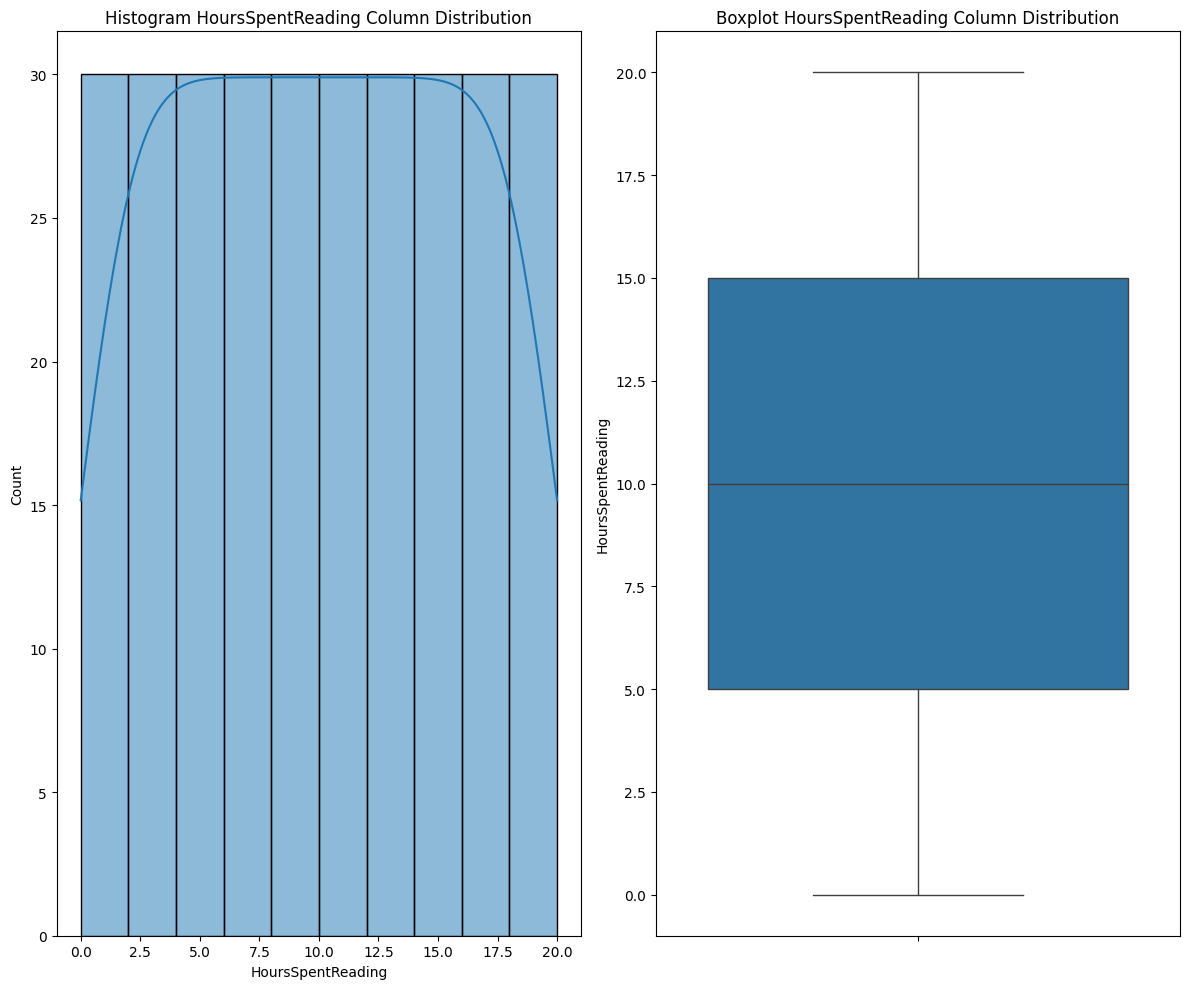

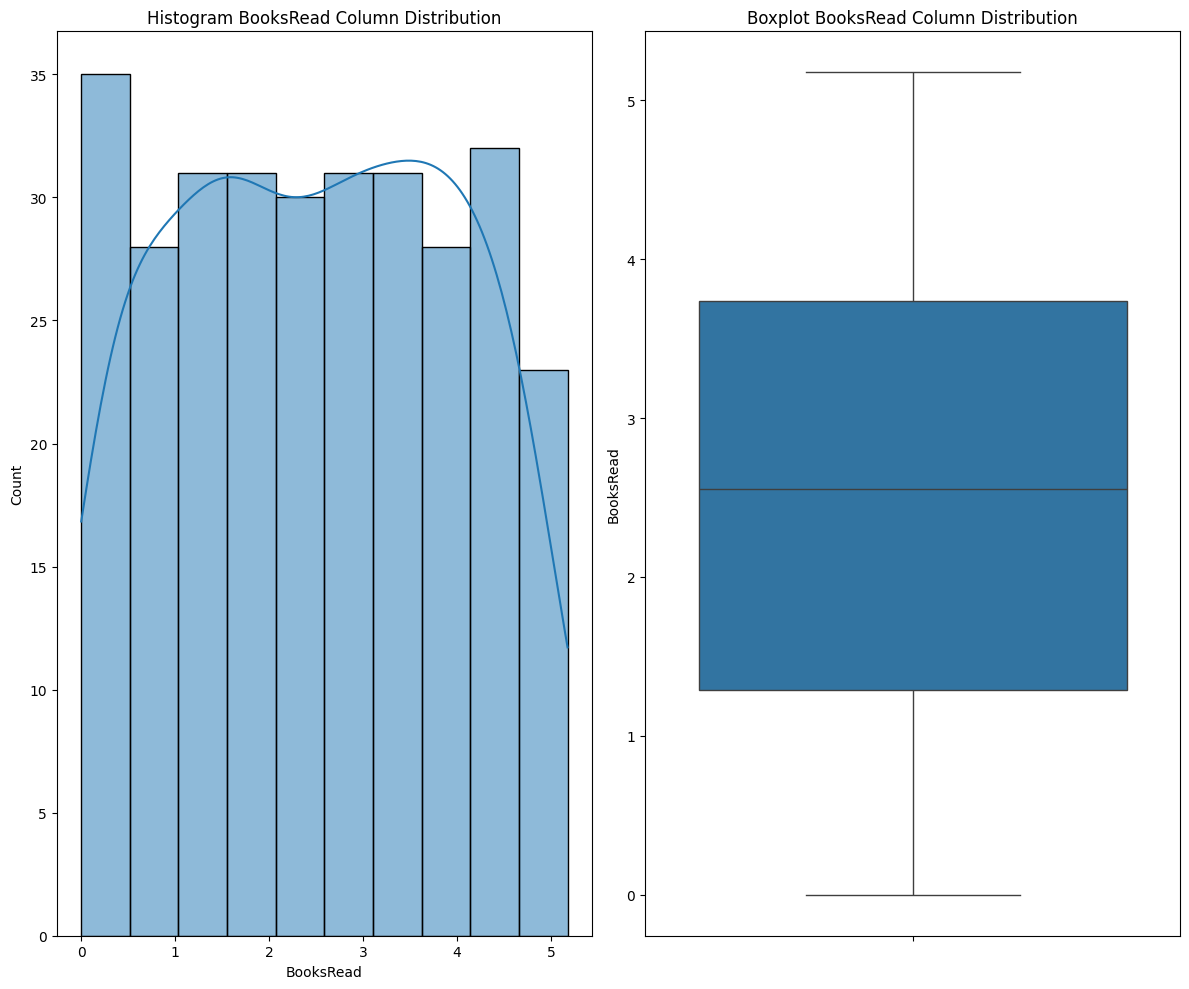

In [43]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram {col} Column Distribution")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot {col} Column Distribution")
    plt.tight_layout()

## B. Data Preprocessing

### No Need To Preprocess

## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Main Feature & Target Distributions

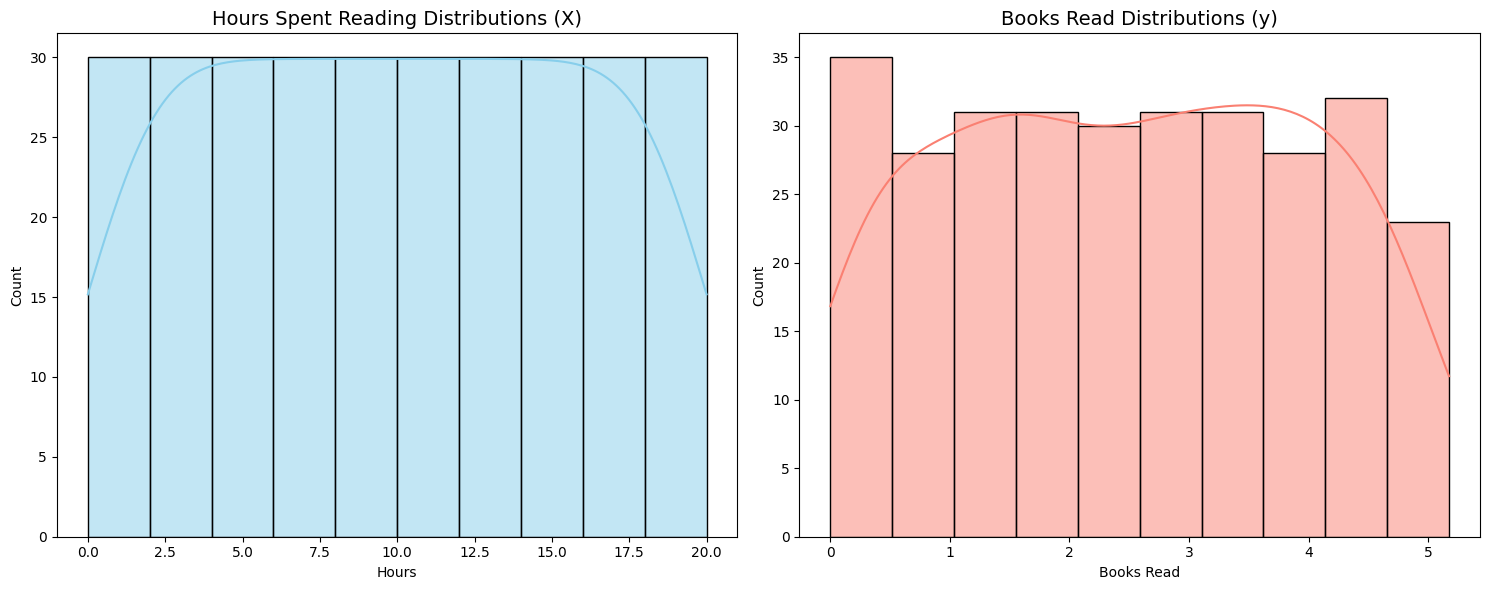

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['HoursSpentReading'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Hours Spent Reading Distributions (X)', fontsize=14)
axes[0].set_xlabel('Hours')

sns.histplot(df['BooksRead'], kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Books Read Distributions (y)', fontsize=14)
axes[1].set_xlabel('Books Read')

plt.tight_layout()
plt.show()

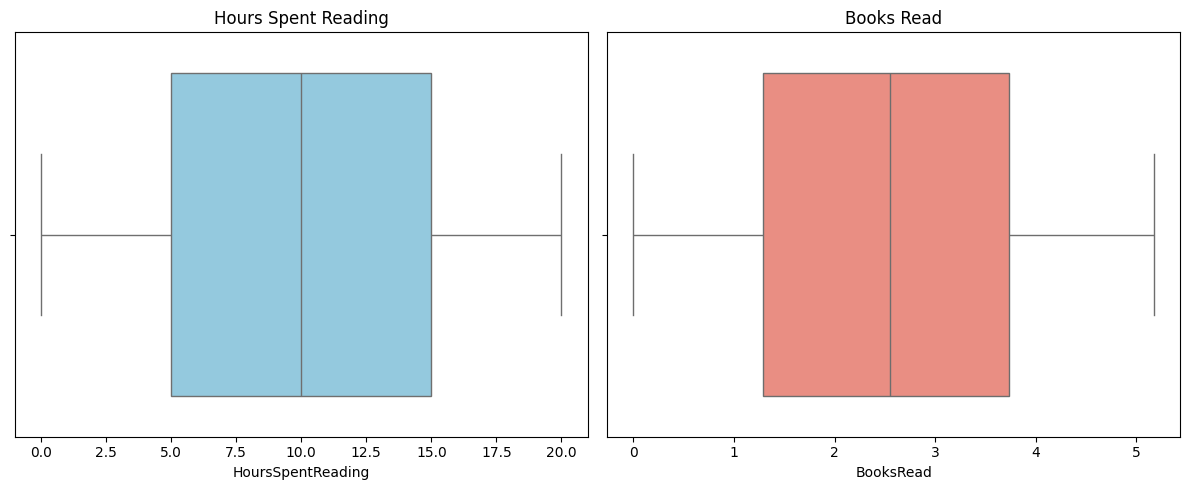

In [45]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['HoursSpentReading'], color='skyblue')
plt.title('Hours Spent Reading')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['BooksRead'], color='salmon')
plt.title('Books Read')

plt.tight_layout()
plt.show()

### C.2 Bivariate Analysis

#### Regplot (Square Footage VS House Price)

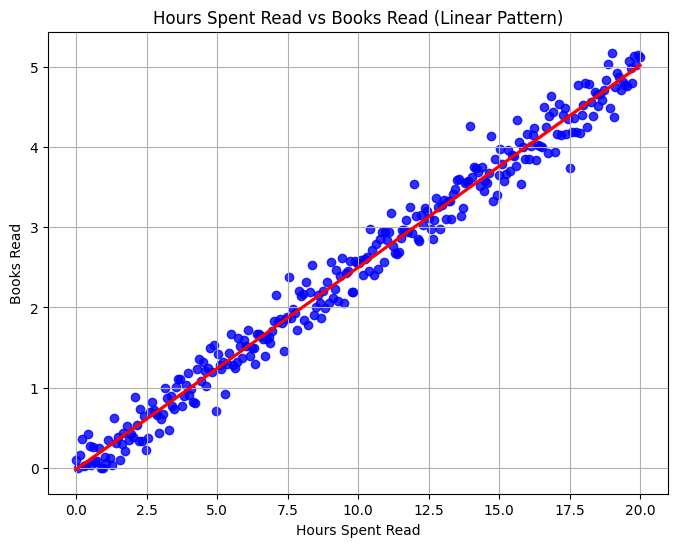

In [46]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='HoursSpentReading', y='BooksRead', color='blue', line_kws={'color' : 'red'})
plt.title("Hours Spent Read vs Books Read (Linear Pattern)")
plt.xlabel("Hours Spent Read")
plt.ylabel("Books Read")
plt.grid(True)
plt.show()

#### Jointplot (Square Footage VS House Price)

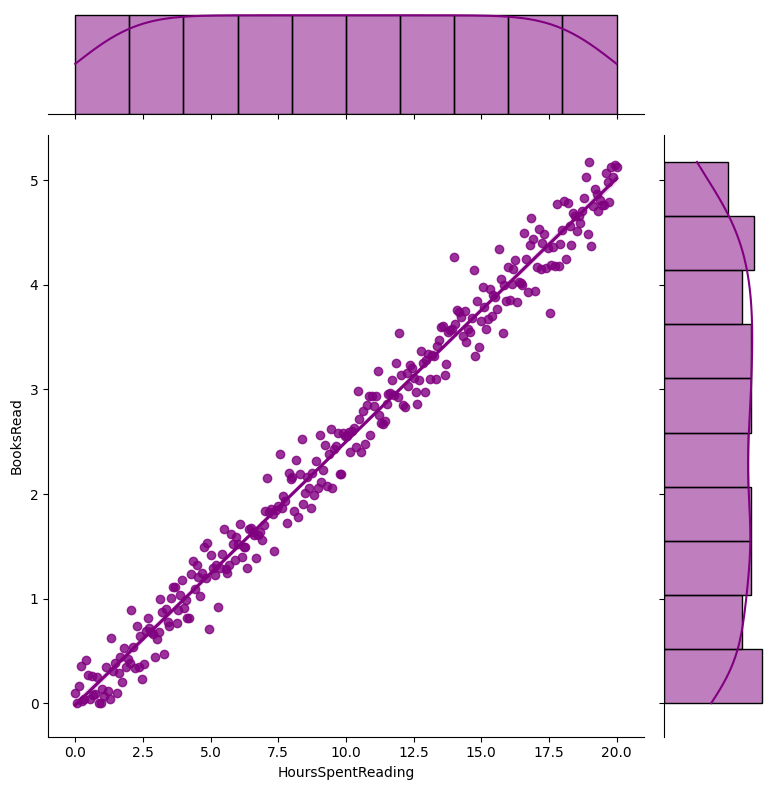

In [47]:
sns.jointplot(x='HoursSpentReading', y='BooksRead', data=df, kind='reg', color='purple', height=8)
plt.show()

### C.3 Multivariate Analysis

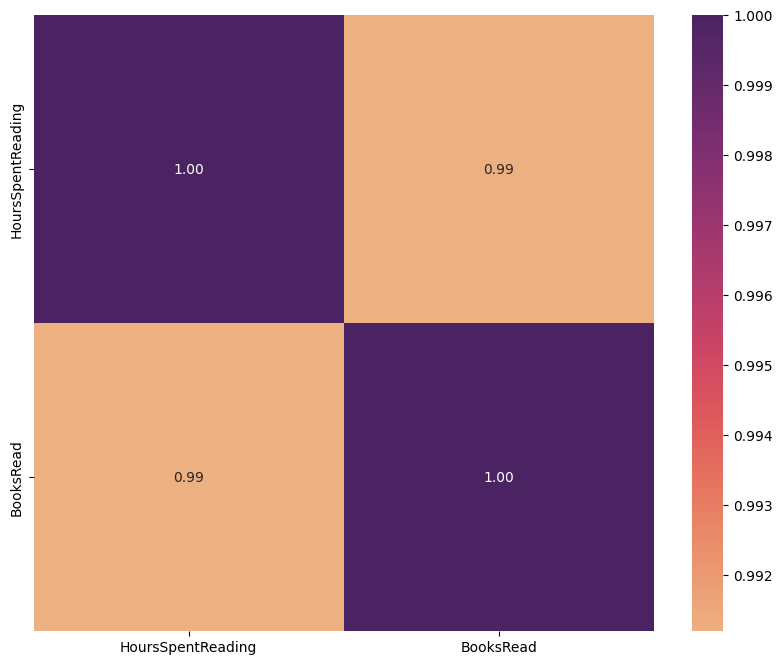

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='flare', fmt='.2f')
plt.show()

## D. Modelling

### D.1 Defining X (Features) and y (Target) Variables

In [68]:
X_data = df[['HoursSpentReading']]
y_data = df['BooksRead']

### D.2 Splitting Data Test and Data Train (80:20)

In [69]:
np.random.seed(42)
indices = np.random.permutation(len(X_data))

test_size = int(len(X_data) * 0.2)

train_idx = indices[test_size:]
test_idx = indices[:test_size]

X_train, X_test = X_data.iloc[train_idx], X_data.iloc[test_idx]
y_train, y_test = y_data.iloc[train_idx], y_data.iloc[test_idx]

### D.3 Matrix Modification (Add Bias)

In [70]:
ones_train = np.ones((len(X_train), 1))
ones_test = np.ones((len(X_test), 1))

X_train = np.concatenate((ones_train, X_train), axis=1)
X_test = np.concatenate((ones_test, X_test), axis=1)

### D.4 Calculate Theta (OLS Normal Equation)

In [71]:
theta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

test_predictions = X_test @ theta
train_predictions = X_train @ theta

In [72]:
theta.shape

(2,)

### D.5 Modelling Results

In [76]:
intercept = theta[0]
slope = theta[1]

print("======= Modelling Results =======")
print(f"Intercept (Starting Books): {intercept:.2f}")
print(f"Slope (Hours Spent Reading): {slope:.2f}")
print(f"Books Read Formula: y = ({slope:.2f} * Hours Spent Reading) + {intercept:.2f}")

======= Modelling Results =======
Intercept (Starting Books): -0.02
Slope (Hours Spent Reading): 0.25
Books Read Formula: y = (0.25 * Hours Spent Reading) + -0.02


### D.6 Regression Visualization

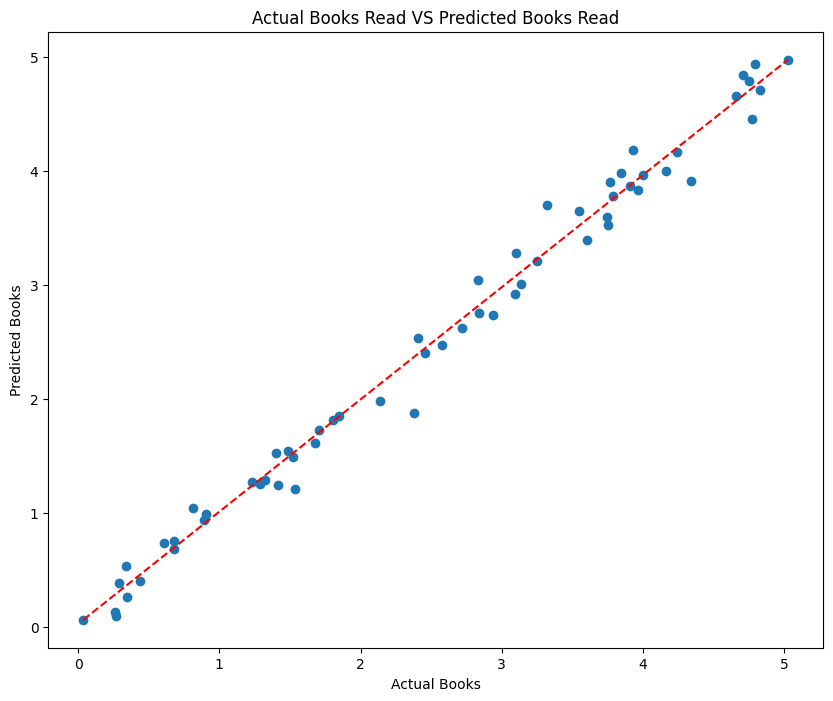

In [77]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, test_predictions)
plt.plot([y_test.min(), y_test.max()], [test_predictions.min(), test_predictions.max()], 'r--')

plt.title("Actual Books Read VS Predicted Books Read")
plt.xlabel("Actual Books")
plt.ylabel("Predicted Books")
plt.show()

## E. Evaluation

### E.1 Calculate MSE (Mean Squared Error)

#### Error Test & Train

In [78]:
test_error = y_test - test_predictions
train_error = y_train - train_predictions

#### Test MSE

In [79]:
test_mse = np.mean(test_error ** 2)
print(f"MSE (Test): {test_mse:.2f}")

MSE (Test): 0.03


#### Train MSE

In [80]:
train_mse = np.mean(train_error ** 2)
print(f"MSE (Train): {train_mse:.2f}")

MSE (Train): 0.04


### E.2 Calculate MAE (Mean Absolute Error)

#### Test MAE

In [81]:
test_mae = np.mean(np.abs(test_error))
print(f"MAE (Test): {test_mae:.2f}")

MAE (Test): 0.13


#### Train MAE

In [82]:
train_mae = np.mean(np.abs(train_error))
print(f"MAE (Train): {train_mae:.2f}")

MAE (Train): 0.16


### E.3 Calculate RMSE (Root Mean Squared Error)

#### Test RMSE

In [83]:
test_rmse = np.sqrt(test_mse)
print(f"RMSE (Test): {test_rmse:.2f}")

RMSE (Test): 0.16


#### Train RMSE

In [84]:
train_rmse = np.sqrt(train_mse)
print(f"RMSE (Train): {train_rmse:.2f}")

RMSE (Train): 0.20


### E.4 Calculate R-Squared (Accuracy)

#### Test R-Squared

In [85]:
test_ss_residual = np.sum(test_error ** 2)
test_ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
test_r_squared = 1 - test_ss_residual / test_ss_total
print(f"R-Squared (Test): {test_r_squared}")

R-Squared (Test): 0.9878799451252703


#### Train R-Squared

In [86]:
train_ss_residual = np.sum(train_error ** 2)
train_ss_total = np.sum((y_train - np.mean(y_train)) ** 2)
train_r_squared = 1 - train_ss_residual / train_ss_total
print(f"R-Squared (Train): {train_r_squared}")

R-Squared (Train): 0.9810577409000293


### E.5 Calculate Adjusted R-Squared (Accuracy)

#### Test Adjusted R-Squared

In [87]:
test_n = len(y_test)
test_p = X_test.shape[1] - 1

test_adj_r_squared = 1 - ((1 - test_r_squared) * (test_n - 1) / (test_n - test_p - 1))
print(f"Adjusted R-Squared (Test): {test_adj_r_squared}")

Adjusted R-Squared (Test): 0.9876709786619129


#### Train Adjusted R-Squared

In [88]:
train_n = len(y_train)
train_p = X_train.shape[1] - 1

train_adj_r_squared = 1 - ((1 - train_r_squared) * (train_n - 1) / (train_n - train_p - 1))
print(f"Adjusted R-Squared (Train): {train_adj_r_squared}")

Adjusted R-Squared (Train): 0.9809781515760798


### E.6 Residuals VS Predictions

Text(0.5, 0, 'Error (Residuals)')

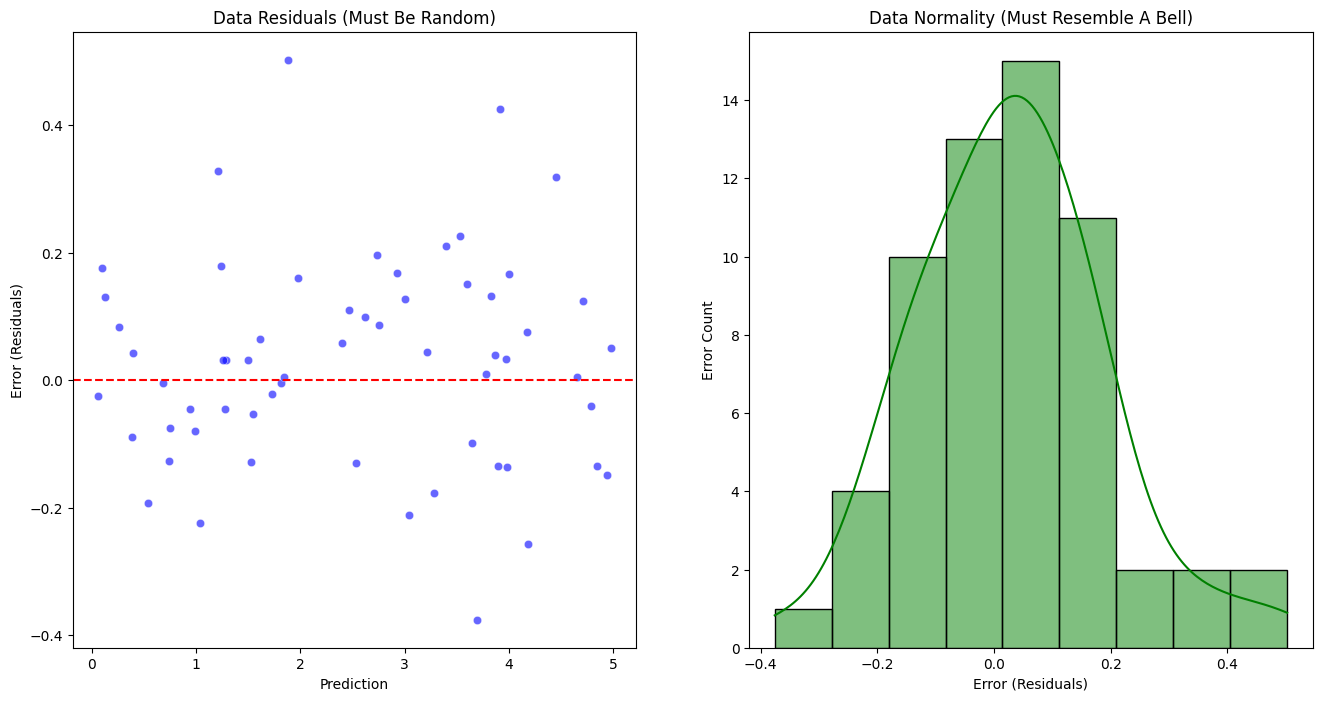

In [89]:
residuals = y_test - test_predictions

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(y=residuals, x=test_predictions, ax=axes[0], alpha=0.6, color='blue')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title("Data Residuals (Must Be Random)")
axes[0].set_ylabel("Error (Residuals)")
axes[0].set_xlabel("Prediction")

sns.histplot(residuals, ax=axes[1], kde=True, color='green')
axes[1].set_title("Data Normality (Must Resemble A Bell)")
axes[1].set_ylabel("Error Count")
axes[1].set_xlabel("Error (Residuals)")

### E.7 Model Evaluation (Visual)

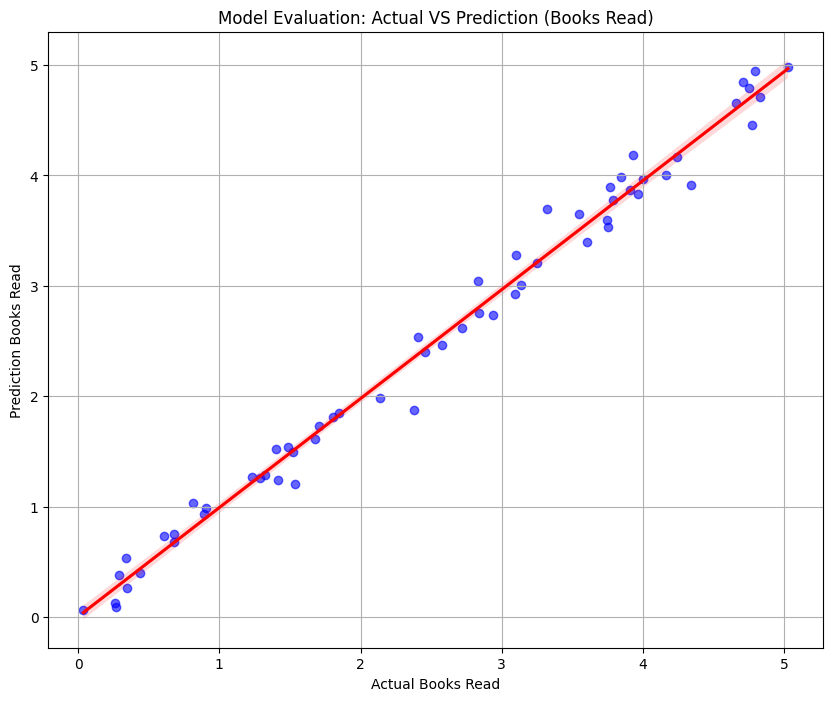

In [90]:
plt.figure(figsize=(10, 8))

sns.regplot(x=y_test, y=test_predictions, color='blue', line_kws={'color' : 'red'}, scatter_kws={'alpha' : 0.6}, order=1)
plt.title("Model Evaluation: Actual VS Prediction (Books Read)")
plt.xlabel("Actual Books Read")
plt.ylabel("Prediction Books Read")
plt.grid(True)

plt.show()